### Μηχανική Μάθηση
#### 2η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ - 7ο εξάμηνο -Ακ. Έτος 2023-24



# ⚠️
`Επισημαίνεται ότι απαγορεύεται η ανάρτηση των λύσεων των εργαστηριακών ασκήσεων στο github, ή σε άλλες ιστοσελίδες. Η σχεδίαση και το περιεχόμενο των εργαστηριακών projects αποτελούν αντικείμενο πνευματικής ιδιοκτησίας της διδακτικής ομάδας του μαθήματος.`

### Εισαγωγή
Στην άσκηση αυτή θα χρησιμοποιήσετε τη μέθοδο συσταδοποίησης k-Μeans, καθώς και τη μέθοδο μείωσης διαστατικότητας PCA σε υπερφασματική εικόνα.

Ονοματεπώνυμο φοιτητή: Αποστολία Χρυσοβαλάντου Σκέντζου

Α.Μ.:03120054

### 1. Φόρτωση υπερφασματικής εικόνας

Κατεβάστε την υπερφασματική εικόνα `indian_pines_corrected.npy` και τις αντίστοιχες επισημειώσεις `indian_pines_gt.npy` από το Google Drive:
https://drive.google.com/drive/folders/15hbGoLga9n4K6wxRP6qsLV1P-7Nj-Vht?usp=sharing

1.α. Φορτώστε την εικόνα με χρήση της συνάρτησης numpy.load

In [48]:
import numpy as np
picture = np.load("/indian_pines_corrected.npy")

1.β. Χρησιμοποιώντας την ίδια συνάρτηση, φορτώστε τις αντίστοιχες επισημειώσεις ανά pixel εικόνας `indian_pines_gt.npy`. Οι επισημειώσεις αυτές αντιστοιχίζουν κάθε pixel της υπερφασματικής εικόνας σε ένα τύπο από 17 διαφορετικές κατηγορίες (η επισημείωση 0 αντιστοιχεί σε "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [56]:
labels = np.load("/indian_pines_gt.npy")

### 2. Οπτικοποίηση και Διερευνητική ανάλυση δεδομένων

Παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. Βρείτε το ύψος και το πλάτος της εικόνας, καθώς και τον αριθμό των υπερφασματικών καναλιών

2β. Σχεδιάστε με χρήση της matplotlib το 3ο, 65ο, και 95ο κανάλι της εικόνας

2γ. Υπολογίστε τον αριθμό των διαφορετικών κατηγοριών καλλιέργειας/κλάσης στις επισημειώσεις

2δ. Σχεδιάστε με χρήση της matplotlib τις επισημειώσεις σε μορφή εικόνας. Προσθέστε επιπλέον επεξηγηματική λεζάντα με χρήση της βιβλιοθήκης κάθε επισημείωσης (χρησιμοποιήστε τη λίστα `classes` που σας δόθηκε προηγουμένως).

2ε. Υπολογίστε πόσα pixels της εικόνας αντιστοιχούν σε κάθε τύπο καλλιέργειας

In [57]:
#2α
height, width, channels = picture.shape

print(f"Ύψος: {height}")
print(f"Πλάτος: {width}")
print(f"Αριθμός υπερφασματικών καναλιών: {channels}")

Ύψος: 145
Πλάτος: 145
Αριθμός υπερφασματικών καναλιών: 200


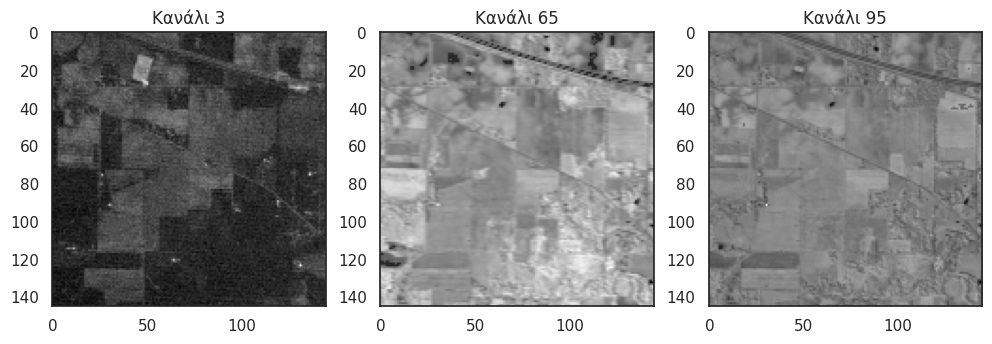

In [58]:
#2β
import matplotlib.pyplot as plt

channel_3 = picture[:, :, 2]
channel_65 = picture[:, :, 64]
channel_95 = picture[:, :, 94]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(channel_3, cmap='gray')
plt.title('Κανάλι 3')

plt.subplot(1, 3, 2)
plt.imshow(channel_65, cmap='gray')
plt.title('Κανάλι 65')

plt.subplot(1, 3, 3)
plt.imshow(channel_95, cmap='gray')
plt.title('Κανάλι 95')

plt.show()

In [59]:
#2γ
unique_labels = np.unique(labels)
num_classes = len(unique_labels)
print(f'Αριθμός διαφορετικών κατηγοριών: {num_classes}')

Αριθμός διαφορετικών κατηγοριών: 17


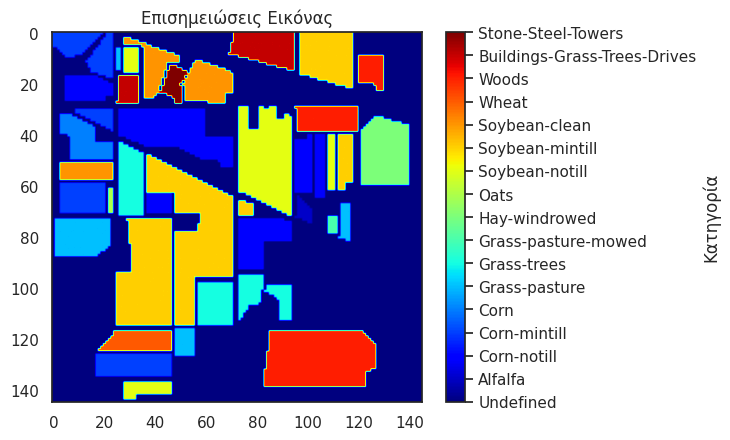

In [60]:
#2δ
import numpy as np
import matplotlib.pyplot as plt

labels = np.load("/indian_pines_gt.npy")

classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

plt.imshow(labels, cmap='jet', vmin=0, vmax=len(classes)-1)
cbar = plt.colorbar(ticks=np.arange(len(classes)), label='Κατηγορία')
cbar.set_ticklabels(classes)
plt.title('Επισημειώσεις Εικόνας')

plt.show()

plt.show()

In [61]:
#2ε

unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Κατηγορία: {label} - Πλήθος Pixels: {count}")

Κατηγορία: 0 - Πλήθος Pixels: 10776
Κατηγορία: 1 - Πλήθος Pixels: 46
Κατηγορία: 2 - Πλήθος Pixels: 1428
Κατηγορία: 3 - Πλήθος Pixels: 830
Κατηγορία: 4 - Πλήθος Pixels: 237
Κατηγορία: 5 - Πλήθος Pixels: 483
Κατηγορία: 6 - Πλήθος Pixels: 730
Κατηγορία: 7 - Πλήθος Pixels: 28
Κατηγορία: 8 - Πλήθος Pixels: 478
Κατηγορία: 9 - Πλήθος Pixels: 20
Κατηγορία: 10 - Πλήθος Pixels: 972
Κατηγορία: 11 - Πλήθος Pixels: 2455
Κατηγορία: 12 - Πλήθος Pixels: 593
Κατηγορία: 13 - Πλήθος Pixels: 205
Κατηγορία: 14 - Πλήθος Pixels: 1265
Κατηγορία: 15 - Πλήθος Pixels: 386
Κατηγορία: 16 - Πλήθος Pixels: 93


### 3. Εύρεση φασματικών υπογραφών

3.α. Μετατρέψτε την υπερφασματική εικόνα και τις επισημειώσεις σε μορφή κατάλληλη για περαιτέρω επεξεργασία. Η εικόνα θα πρέπει να μετατραπεί σε πίνακα N x Κ, όπου Ν είναι ο αριθμός των pixels και K ο αριθμός των καναλιών. Οι επισημειώσεις αντίστοιχα θα πρέπει να μετατραπούν σε διάνυσμα μήκους Ν. Στη συνέχεια, αφαιρέστε όσα δεδομένα είναι επισημειωμένα ως `Undefined`.

💡 Χρησιμοποιήστε την `numpy reshape`

3.β. Επιλέξτε ένα τυχαίο pixel της εικόνας από κάθε κατηγορία, είτε με προγραμματιστικό τρόπο, είτε χειροκίνητα.

3.γ. Γράψτε κώδικα για να σχεδιάσετε την υπερφασματική υπογραφή των επιλεγμένων pixels.

3.δ. Επαναλάβετε την προηγούμενη διαδικασία άλλες δύο φορές, σχεδιάζοντας τα νέα διαγράμματα.

3.ε. Σημειώστε τις παρατηρήσεις σας και τα συμπεράσματα σας. Προσπαθήστε να απαντήσετε στις ακόλουθες ερωτήσεις:
    
* Με βάση τα προηγούμενα διαγράμματα θεωρείτε ότι κάποιες καλλιέργειες είναι πιο εύκολα διαχωρίσιμες από άλλες με βάση τη φασματική υπογραφή τους;
* Θεωρείτε ότι όλα τα κανάλια παρέχουν χρήσιμη πληροφορία για το διαχωρισμό;

3.στ. Σχεδιάστε ένα heatmap, που να δείχνει τη συσχέτιση μεταξύ των διαφορετικών καναλιών

In [62]:
import numpy as np

num_pixels = picture.shape[0] * picture.shape[1]
num_channels = picture.shape[2]

reshaped_picture = picture.reshape(num_pixels, num_channels)

reshaped_labels = labels.flatten()

undefined_indices = np.where(reshaped_labels == 0)[0]

reshaped_picture = np.delete(reshaped_picture, undefined_indices, axis=0)
reshaped_labels = np.delete(reshaped_labels, undefined_indices)

print(f"Διαστάσεις νέας υπερφασματικής εικόνας: {reshaped_picture.shape}")
print(f"Διάσταση νέων επισημειώσεων: {reshaped_labels.shape}")


Διαστάσεις νέας υπερφασματικής εικόνας: (10249, 200)
Διάσταση νέων επισημειώσεων: (10249,)


In [63]:
#3β
import random

categories = np.unique(labels)[1:]

random_pixels = []

for label in categories:
    indices = np.where(labels == label)

    random_index = random.choice(range(len(indices[0])))

    random_pixels.append((indices[0][random_index], indices[1][random_index]))

for label, pixel in zip(unique_labels, random_pixels):
    print(f"Κατηγορία: {label} - Τυχαίο Pixel: {pixel}")


Κατηγορία: 0 - Τυχαίο Pixel: (74, 101)
Κατηγορία: 1 - Τυχαίο Pixel: (35, 38)
Κατηγορία: 2 - Τυχαίο Pixel: (8, 9)
Κατηγορία: 3 - Τυχαίο Pixel: (47, 7)
Κατηγορία: 4 - Τυχαίο Pixel: (81, 116)
Κατηγορία: 5 - Τυχαίο Pixel: (70, 33)
Κατηγορία: 6 - Τυχαίο Pixel: (72, 108)
Κατηγορία: 7 - Τυχαίο Pixel: (36, 134)
Κατηγορία: 8 - Τυχαίο Pixel: (67, 22)
Κατηγορία: 9 - Τυχαίο Pixel: (49, 109)
Κατηγορία: 10 - Τυχαίο Pixel: (3, 113)
Κατηγορία: 11 - Τυχαίο Pixel: (20, 52)
Κατηγορία: 12 - Τυχαίο Pixel: (123, 39)
Κατηγορία: 13 - Τυχαίο Pixel: (35, 104)
Κατηγορία: 14 - Τυχαίο Pixel: (1, 84)
Κατηγορία: 15 - Τυχαίο Pixel: (16, 45)


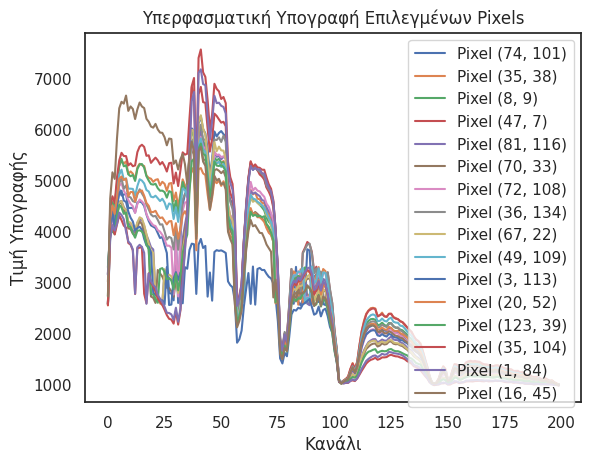

In [64]:
#3γ
import matplotlib.pyplot as plt

selected_pixels_indices = random_pixels

for index in selected_pixels_indices:
    pixel_signature = picture[index[0], index[1], :]

    plt.plot(pixel_signature, label=f"Pixel {index}")

plt.title('Υπερφασματική Υπογραφή Επιλεγμένων Pixels')
plt.xlabel('Κανάλι')
plt.ylabel('Τιμή Υπογραφής')
plt.legend()
plt.show()


Κατηγορία: 0 - Τυχαίο Pixel: (69, 100)
Κατηγορία: 1 - Τυχαίο Pixel: (77, 82)
Κατηγορία: 2 - Τυχαίο Pixel: (2, 3)
Κατηγορία: 3 - Τυχαίο Pixel: (49, 23)
Κατηγορία: 4 - Τυχαίο Pixel: (84, 12)
Κατηγορία: 5 - Τυχαίο Pixel: (97, 80)
Κατηγορία: 6 - Τυχαίο Pixel: (72, 108)
Κατηγορία: 7 - Τυχαίο Pixel: (58, 137)
Κατηγορία: 8 - Τυχαίο Pixel: (66, 23)
Κατηγορία: 9 - Τυχαίο Pixel: (9, 32)
Κατηγορία: 10 - Τυχαίο Pixel: (89, 39)
Κατηγορία: 11 - Τυχαίο Pixel: (13, 37)
Κατηγορία: 12 - Τυχαίο Pixel: (122, 46)
Κατηγορία: 13 - Τυχαίο Pixel: (128, 105)
Κατηγορία: 14 - Τυχαίο Pixel: (4, 91)
Κατηγορία: 15 - Τυχαίο Pixel: (24, 48)


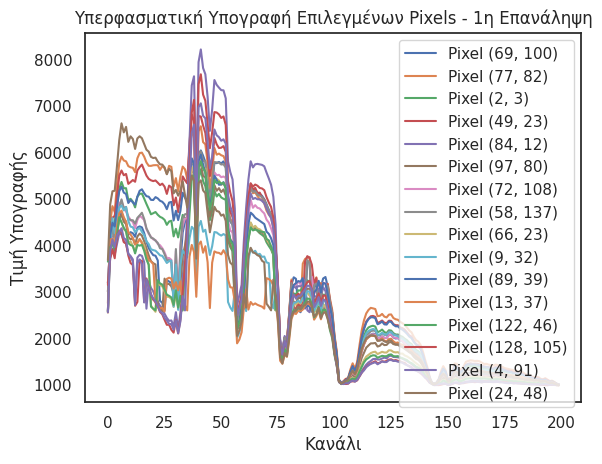

Κατηγορία: 0 - Τυχαίο Pixel: (72, 99)
Κατηγορία: 1 - Τυχαίο Pixel: (78, 93)
Κατηγορία: 2 - Τυχαίο Pixel: (65, 5)
Κατηγορία: 3 - Τυχαίο Pixel: (49, 10)
Κατηγορία: 4 - Τυχαίο Pixel: (125, 55)
Κατηγορία: 5 - Τυχαίο Pixel: (50, 34)
Κατηγορία: 6 - Τυχαίο Pixel: (75, 110)
Κατηγορία: 7 - Τυχαίο Pixel: (47, 138)
Κατηγορία: 8 - Τυχαίο Pixel: (69, 22)
Κατηγορία: 9 - Τυχαίο Pixel: (29, 85)
Κατηγορία: 10 - Τυχαίο Pixel: (69, 78)
Κατηγορία: 11 - Τυχαίο Pixel: (21, 69)
Κατηγορία: 12 - Τυχαίο Pixel: (122, 36)
Κατηγορία: 13 - Τυχαίο Pixel: (34, 119)
Κατηγορία: 14 - Τυχαίο Pixel: (10, 89)
Κατηγορία: 15 - Τυχαίο Pixel: (15, 45)


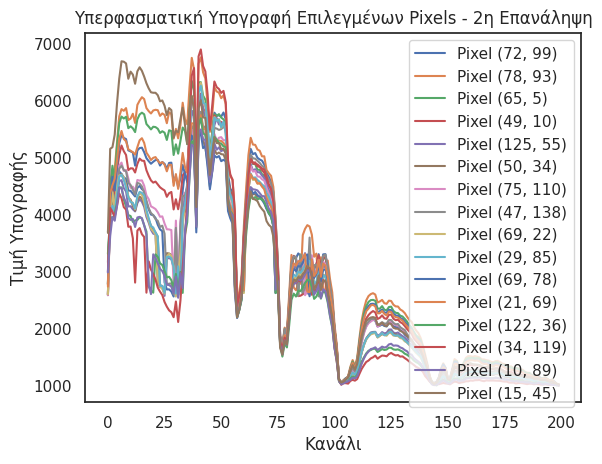

In [65]:
#3δ
# 1η επανάληψη
# Επιλογή τυχαίων pixels
random_pixels_1 = []
for label in categories:
    indices = np.where(labels == label)
    random_index_1 = random.choice(range(len(indices[0])))
    random_pixels_1.append((indices[0][random_index_1], indices[1][random_index_1]))
for label, pixel in zip(unique_labels, random_pixels_1):
    print(f"Κατηγορία: {label} - Τυχαίο Pixel: {pixel}")

# Σχεδιασμός υπερφασματικής υπογραφής
for index in random_pixels_1:
    pixel_signature_1 = picture[index[0], index[1], :]
    plt.plot(pixel_signature_1, label=f"Pixel {index}")

plt.title('Υπερφασματική Υπογραφή Επιλεγμένων Pixels - 1η Επανάληψη')
plt.xlabel('Κανάλι')
plt.ylabel('Τιμή Υπογραφής')
plt.legend()
plt.show()

# 2η επανάληψη
# Επιλογή τυχαίων pixels
random_pixels_2 = []
for label in categories:
    indices = np.where(labels == label)
    random_index_2 = random.choice(range(len(indices[0])))
    random_pixels_2.append((indices[0][random_index_2], indices[1][random_index_2]))
for label, pixel in zip(unique_labels, random_pixels_2):
    print(f"Κατηγορία: {label} - Τυχαίο Pixel: {pixel}")

# Σχεδιασμός υπερφασματικής υπογραφής
for index in random_pixels_2:
    pixel_signature_2 = picture[index[0], index[1], :]
    plt.plot(pixel_signature_2, label=f"Pixel {index}")

plt.title('Υπερφασματική Υπογραφή Επιλεγμένων Pixels - 2η Επανάληψη')
plt.xlabel('Κανάλι')
plt.ylabel('Τιμή Υπογραφής')
plt.legend()
plt.show()

3ε)

Ναι, παρατηρούμε σημαντικές διαφορές στη διαχωριστική ικανότητα των καλλιεργειών με βάση την ανάλυση της φασματικής υπογραφής. Ορισμένες καλλιέργειες φαίνεται να είναι πιο διαχωρίσιμες, καθιστώντας πιο εύκολο τον διαχωρισμό τους, ενώ άλλες μπορεί να εμφανίζουν επικάλυψη στη φασματική υπογραφή τους, πράγμα που δυσκολεύει τη διάκριση.

Σημαντικό είναι επίσης το γεγονός ότι ορισμένα κανάλια παρέχουν σημαντικά περισσότερη πληροφορία και επιρροή στη διαχωριστικότητα ανάμεσα στις καλλιέργειες. Κανάλια που διακρίνονται καλύτερα στη φασματική υπογραφή των καλλιεργειών είναι περισσότερο χρήσιμα για τον διαχωρισμό, ενώ κανάλια που παρέχουν λιγότερη διακριτική ικανότητα μπορεί να έχουν περιορισμένη συνεισφορά.

Οι παρατηρήσεις αυτές υπογραμμίζουν τη σημασία της επιλογής κατάλληλων καναλιών και της κατανόησης της φύσης των καλλιεργειών για τη βελτιστοποίηση της διαδικασίας διαχωρισμού.

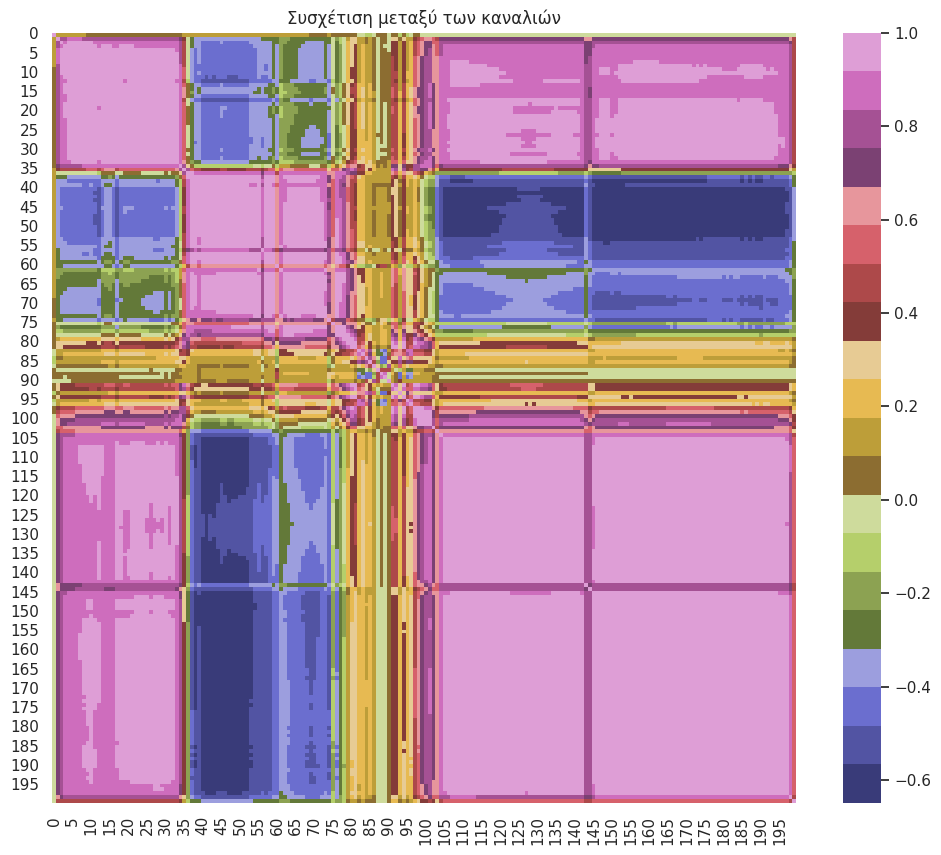

In [71]:
#3στ
import seaborn as sns

correlation_matrix = np.corrcoef(reshaped_picture, rowvar=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='tab20b')
plt.title('Συσχέτιση μεταξύ των καναλιών')

plt.show()

### 4. Συσταδοποίηση με χρήση του αλγορίθμου k-Means

 4.α. Εφαρμόστε τον αλγόριθμο k-Means (sklearn.cluster) στα δεδομένα (εφόσον κάνατε την προεπεξεργασία του Βήματος 3). Χρησιμοποιήστε την τιμή `n_cluster=16`.

4.β. Υπολογίστε τις ακόλουθες μετρικές των προβλέψεων του αλγορίθμου

* Accuracy Score
* Rand Score
* Silhouette Score

Σημειώστε ότι για τη συνάρτηση rand_score μπορείτε να δώσετε σαν είσοδο τα αρχικά labels που σας δόθηκαν μαζί με τα predicted. Για τον υπολογισμό όμως του accuracy, θα πρέπει να αντιστοιχίσουμε τα διαφορετικά ID των clusters στην έξοδο του KMeans, με τις κατηγορίες της αρχικής επισημείωσης. Για την μετατροπή αυτή μπορείτε να χρησιμοποιήσετε την ακόλουθη συνάρτηση που σας δίνεται `translate_predicted_labels`.

In [72]:
!pip install munkres
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

4.δ. Σχεδιάστε το confusion matrix (χρησιμοποιήστε τα αντιστοιχισμένα predicted labels).

4.ε. Όπως στο 2.δ. σχεδιάστε με χρήση της matplotlib τα predicted labels σε μορφή εικόνας.

In [81]:
#4α
from sklearn.cluster import KMeans

kmeans_model.fit(reshaped_picture)

clusters = kmeans_model.predict(reshaped_picture)

print("Προσαρμοσμένες Ετικέτες των Clusters:")
print(clusters)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Προσαρμοσμένες Ετικέτες των Clusters:
[8 0 0 ... 9 9 9]


In [85]:
labels_altered = reshaped_labels - 1;

Την παραπάνω ενέργεια την κάναμε για να γίνει σωστά η αντιστοίχιση με την συνάρτηση που μας δόθηκε, να έχουμε δηάδή κατηγορίες 0-15.

In [91]:
#4β
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score

translated_predicted_labels = translate_predicted_labels(clusters, labels_altered)

accuracy = accuracy_score(labels_altered, translated_predicted_labels)
rand_score = adjusted_rand_score(reshaped_labels, clusters)
silhouette = silhouette_score(reshaped_picture, clusters)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Rand Score: {rand_score:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")


map: 0 --> 10
map: 1 --> 14
map: 2 --> 2
map: 3 --> 5
map: 4 --> 0
map: 5 --> 13
map: 6 --> 1
map: 7 --> 7
map: 8 --> 9
map: 9 --> 3
map: 10 --> 15
map: 11 --> 6
map: 12 --> 8
map: 13 --> 11
map: 14 --> 4
map: 15 --> 12
Accuracy Score: 0.3554
Rand Score: 0.2052
Silhouette Score: 0.2822


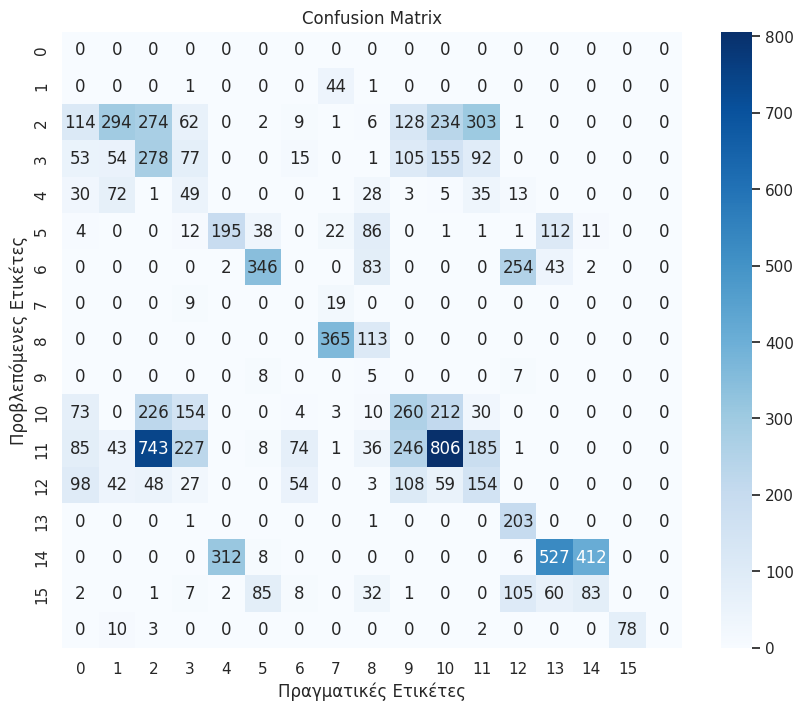

In [97]:
#4δ
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(reshaped_labels, translated_predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(16), yticklabels=range(16))
plt.title('Confusion Matrix')
plt.xlabel('Πραγματικές Ετικέτες')
plt.ylabel('Προβλεπόμενες Ετικέτες')
plt.show()

4ε) Δεν καταφέραμε να παράξουμε μία τέτοια εικόνα όπως στο ερώτημα 2δ. Αυτό συμβαίνει γιατί έχουμε επεξεργαστεί το διάνυσμα των labels αφαιρόντας τα δεδομένα που άνηκαν στην κατηγορία Undefined[0] και άρα το μέγεθος του flattened διανύσματος έγινε από 21025 που ήταν αρχικά σε 10249. Τo γεγονός αυτό μας εμποδίζει από το να κάνουμε reshape στο αρχικό δισδιάστατο σχήμα (145,145) άρα και δεν μπορούμε να δημιουργήσουμε αυτή την εικόνα.

### 5. Μείωση διαστατικότητας δεδομένων

5.α. Εφαρμόστε στα δεδομένα τη μέθοδο μείωσης διαστατικότητας PCA. Επιλέξτε `n_components=3`

5.β. Τι ποσοστό της διακύμανσης των δεδομένων διατηρείτε με `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [124]:
#5α
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(reshaped_picture)

In [128]:
#5β
n_components = 3
explained_variance_ratio = pca.explained_variance_ratio_[:n_components]
cumulative_explained_variance = np.sum(explained_variance_ratio)

print(f"Συνολικό ποσοστό εξηγούμενης διακύμανσης με {n_components} κύριες συνιστώσες: {cumulative_explained_variance * 100:.2f}%")



Συνολικό ποσοστό εξηγούμενης διακύμανσης με 3 κύριες συνιστώσες: 94.20%


### 6. Συνδυασμός μείωσης διαστατικότητας και k-Means

6.α. Εφαρμόστε τον αλγόριθμο kmeans στα δεδομένα μειωμένης διαστατικότητας `n_components=3`, και υπολογίστε εκ νέου τις μετρικές του Βήματος 4.γ.

6.β. Δοκιμάστε διαφορετικές τιμές για το `n_components` (από 1 έως 10) και για κάθε μία από αυτές τις τιμές τρέξτε εκ νέου τον k-Μeans, υπολογίζοντας τα τελικά scores. Για κάθε μετρική, φτιάξτε ένα διάγραμμα που στον άξονα των Χ θα έχει τον αριθμό `n_components` και στον άξονα των Υ, την τιμή της μετρικής. Τι συμπεράσματα βγάζετε;

In [136]:
#6α

pca_labels = kmeans_model.fit_predict(pca_result)
translated_pca_labels = translate_predicted_labels(pca_labels,labels_altered)

accuracy = accuracy_score(labels_altered, translated_pca_labels)
rand_score = adjusted_rand_score(reshaped_labels, pca_labels)
silhouette = silhouette_score(pca_result, pca_labels)

print(f"Accuracy Score: {accuracy:.4f}")
print(f"Rand Score: {rand_score:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 3
map: 3 --> 0
map: 4 --> 1
map: 5 --> 12
map: 6 --> 6
map: 7 --> 9
map: 8 --> 4
map: 9 --> 7
map: 10 --> 15
map: 11 --> 8
map: 12 --> 2
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13
Accuracy Score: 0.3471
Rand Score: 0.2047
Silhouette Score: 0.3383


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 1
map: 1 --> 7
map: 2 --> 13
map: 3 --> 10
map: 4 --> 11
map: 5 --> 5
map: 6 --> 6
map: 7 --> 2
map: 8 --> 4
map: 9 --> 3
map: 10 --> 12
map: 11 --> 15
map: 12 --> 8
map: 13 --> 9
map: 14 --> 14
map: 15 --> 0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 2
map: 1 --> 13
map: 2 --> 12
map: 3 --> 10
map: 4 --> 4
map: 5 --> 8
map: 6 --> 3
map: 7 --> 0
map: 8 --> 9
map: 9 --> 15
map: 10 --> 11
map: 11 --> 14
map: 12 --> 6
map: 13 --> 1
map: 14 --> 7
map: 15 --> 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 9
map: 3 --> 4
map: 4 --> 7
map: 5 --> 0
map: 6 --> 3
map: 7 --> 14
map: 8 --> 1
map: 9 --> 6
map: 10 --> 10
map: 11 --> 8
map: 12 --> 12
map: 13 --> 15
map: 14 --> 13
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 13
map: 2 --> 12
map: 3 --> 5
map: 4 --> 3
map: 5 --> 1
map: 6 --> 4
map: 7 --> 6
map: 8 --> 9
map: 9 --> 0
map: 10 --> 7
map: 11 --> 8
map: 12 --> 10
map: 13 --> 14
map: 14 --> 15
map: 15 --> 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 5
map: 1 --> 10
map: 2 --> 4
map: 3 --> 13
map: 4 --> 9
map: 5 --> 2
map: 6 --> 11
map: 7 --> 7
map: 8 --> 14
map: 9 --> 12
map: 10 --> 6
map: 11 --> 0
map: 12 --> 1
map: 13 --> 15
map: 14 --> 3
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 0
map: 1 --> 9
map: 2 --> 14
map: 3 --> 11
map: 4 --> 5
map: 5 --> 2
map: 6 --> 4
map: 7 --> 10
map: 8 --> 7
map: 9 --> 12
map: 10 --> 6
map: 11 --> 3
map: 12 --> 1
map: 13 --> 15
map: 14 --> 13
map: 15 --> 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 10
map: 1 --> 5
map: 2 --> 4
map: 3 --> 0
map: 4 --> 9
map: 5 --> 1
map: 6 --> 6
map: 7 --> 2
map: 8 --> 14
map: 9 --> 11
map: 10 --> 12
map: 11 --> 8
map: 12 --> 3
map: 13 --> 7
map: 14 --> 15
map: 15 --> 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 13
map: 1 --> 3
map: 2 --> 6
map: 3 --> 1
map: 4 --> 11
map: 5 --> 9
map: 6 --> 12
map: 7 --> 5
map: 8 --> 10
map: 9 --> 8
map: 10 --> 7
map: 11 --> 2
map: 12 --> 14
map: 13 --> 4
map: 14 --> 0
map: 15 --> 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


map: 0 --> 11
map: 1 --> 5
map: 2 --> 3
map: 3 --> 0
map: 4 --> 1
map: 5 --> 12
map: 6 --> 6
map: 7 --> 9
map: 8 --> 4
map: 9 --> 7
map: 10 --> 15
map: 11 --> 8
map: 12 --> 2
map: 13 --> 10
map: 14 --> 14
map: 15 --> 13


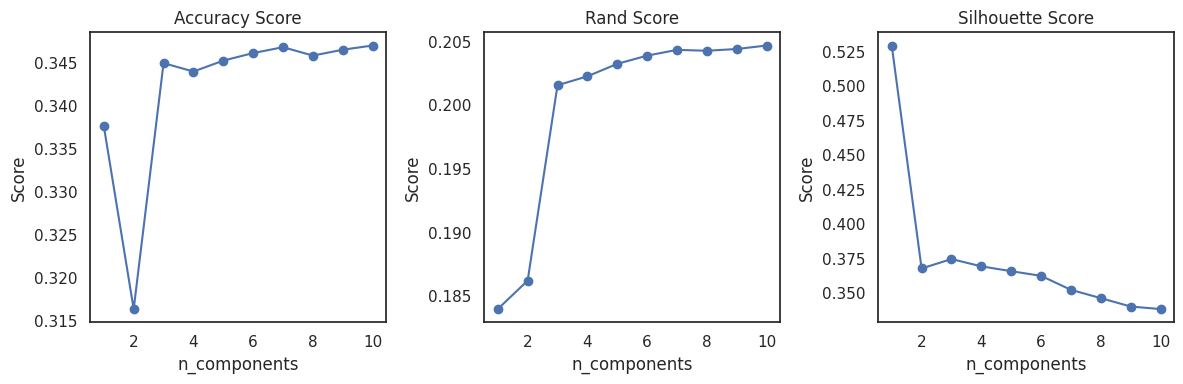

In [137]:
# 6β

n_components_values = list(range(1, 11))

accuracy_scores = []
rand_scores = []
silhouette_scores = []


for n_components in n_components_values:
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(reshaped_picture)

    kmeans = KMeans(n_clusters=16, random_state=42)
    predicted_labels = kmeans.fit_predict(reduced_data)

    new_pca_labels = translate_predicted_labels(predicted_labels,labels_altered)

    accuracy_scores.append(accuracy_score(labels_altered, new_pca_labels))
    rand_scores.append(adjusted_rand_score(reshaped_labels, predicted_labels))
    silhouette_scores.append(silhouette_score(reduced_data, predicted_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(n_components_values, accuracy_scores, marker='o')
plt.title('Accuracy Score')
plt.xlabel('n_components')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(n_components_values, rand_scores, marker='o')
plt.title('Rand Score')
plt.xlabel('n_components')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(n_components_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('n_components')
plt.ylabel('Score')

plt.tight_layout()
plt.show()